<a href="https://colab.research.google.com/github/PatriciaSojcakova/Zneus_Project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
from PIL import Image
import numpy as np
from tqdm import tqdm
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_2/archive/sports.csv')

base_path = "/content/drive/MyDrive/Colab Notebooks/Project_2/archive/"
data['filepaths'] = base_path + data['filepaths']

#**1. Prieskumná analýza dát**

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14493 entries, 0 to 14492
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   14493 non-null  int64 
 1   filepaths  14493 non-null  object
 2   labels     14493 non-null  object
 3   data set   14493 non-null  object
dtypes: int64(1), object(3)
memory usage: 453.0+ KB


###**1.1 Deskriptívne štatistiky**

Počet obrázkov

In [ ]:
print("Total images:", len(data))

Total images: 14493


Počet tried

In [ ]:
print("Number of classes:", data['labels'].nunique())


Number of classes: 100


Distribúcia obrázkov v triedach

In [ ]:
pd.set_option('display.max_rows', None)
display(data['labels'].value_counts())

,count
labels,
football,201
formula 1 racing,200
nascar racing,199
baseball,184
hockey,182
basketball,179
olympic wrestling,177
rugby,176
canoe slamon,174


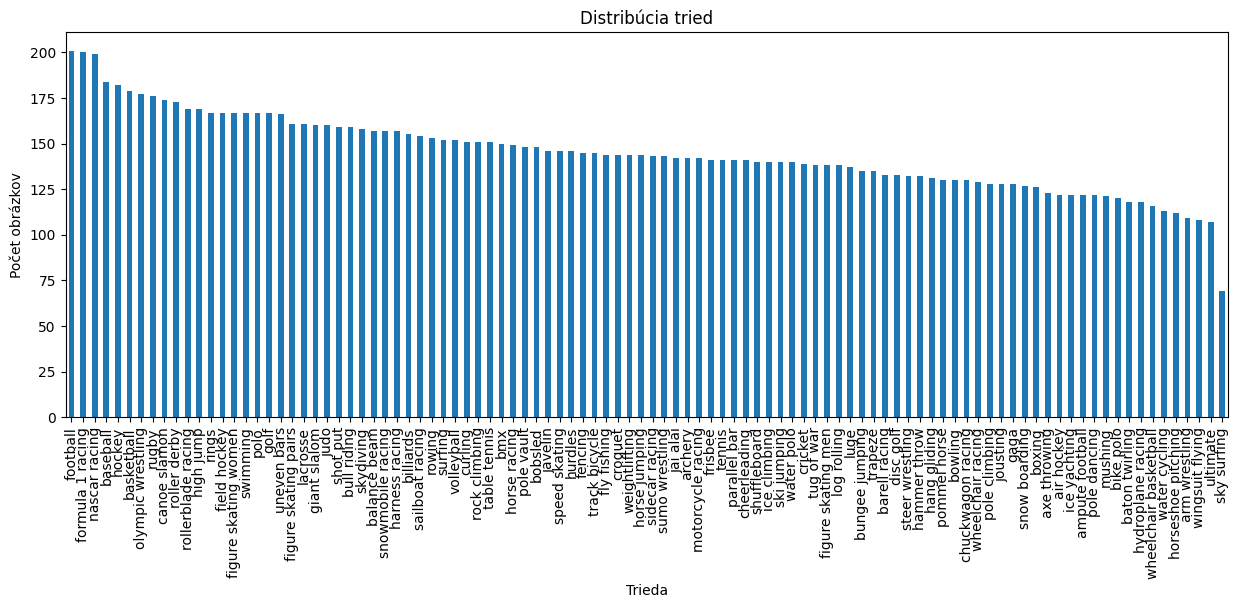

In [ ]:
plt.figure(figsize=(15,5))
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribúcia tried")
plt.xlabel("Trieda")
plt.ylabel("Počet obrázkov")
plt.show()

###**1.2 Výber tried**

Vybrali sme 20 tried na klasifikáciu.

In [ ]:
selected_labels = [
    'archery',
    'axe throwing',
    'basketball',
    'billiards',
    'bowling',
    'football',
    'formula 1 racing',
    'hockey',
    'horse jumping',
    'judo',
    'mushing',
    'rock climbing',
    'rowing',
    'snow boarding',
    'surfing',
    'swimming',
    'table tennis',
    'tennis',
    'volleyball',
    'wingsuit flying'
]

data_filtered = data[data['labels'].isin(selected_labels)]

print(f"Original dataset shape: {data.shape}")
print(f"Filtered dataset shape: {data_filtered.shape}")

data = data_filtered.copy()


Original dataset shape: (14493, 4)
Filtered dataset shape: (3039, 4)


Nová distribúcia tried po filtrácii

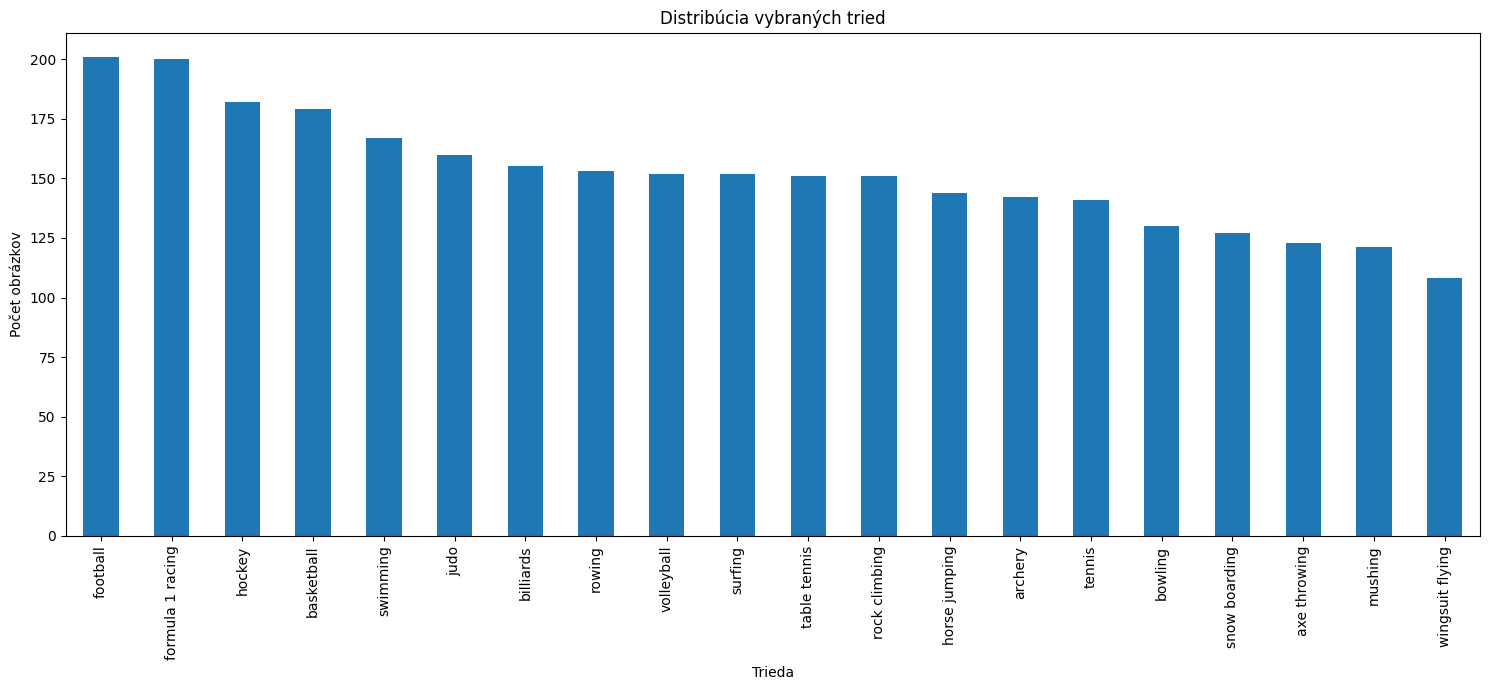

In [ ]:
plt.figure(figsize=(15, 7))
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribúcia vybraných tried")
plt.xlabel("Trieda")
plt.ylabel("Počet obrázkov")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###**1.3 Vizualizácia náhodných obrázkov**

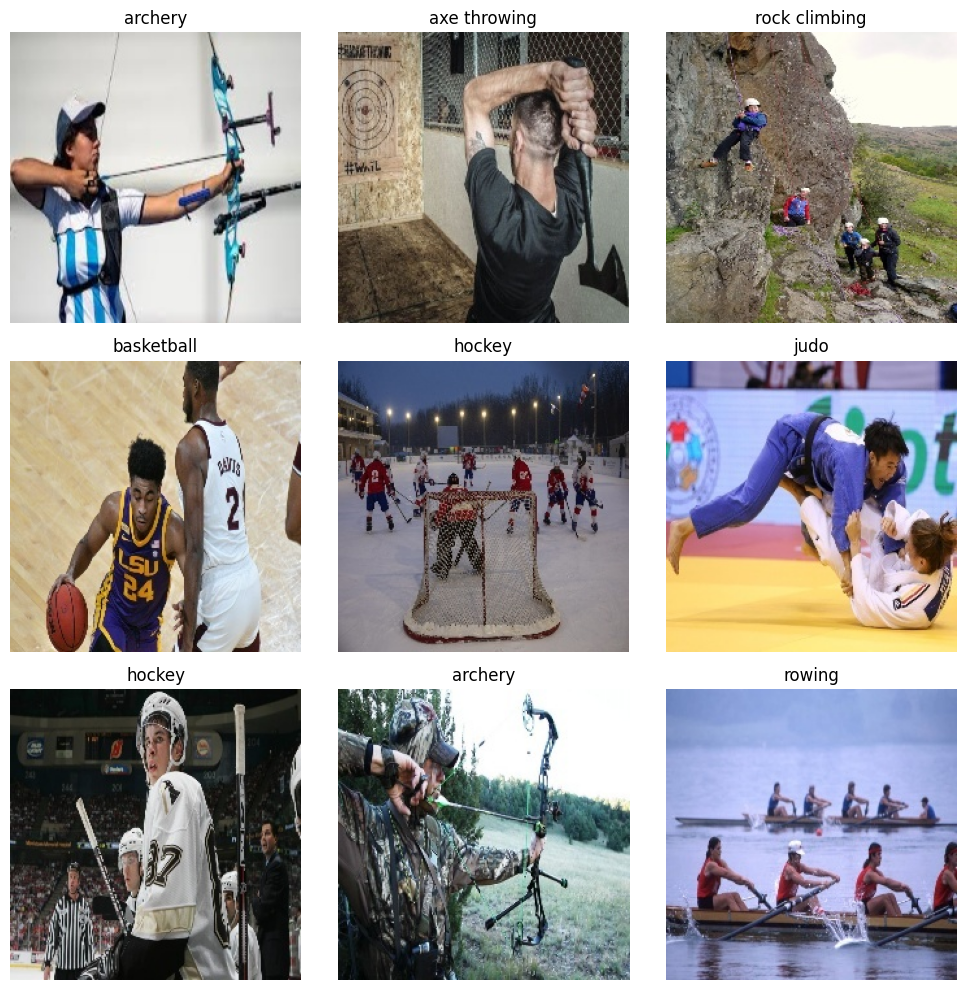

In [ ]:
import random

sample = data.sample(9)

plt.figure(figsize=(10,10))
for i, row in enumerate(sample.itertuples(), 1):
    img = Image.open(row.filepaths)
    plt.subplot(3,3,i)
    plt.imshow(img)
    plt.title(row.labels)
    plt.axis('off')
plt.tight_layout()
plt.show()

###**1.4 Kontrola duplikátov**

Skontrolovali sme duplikáty z hľadiska riadkov a ciest ku konkrétnym obrázkom. Dataset neobsahuje duplikáty.

In [ ]:
print("Duplicated rows:", data.duplicated().sum())

Duplicated rows: 0


In [ ]:
print("Duplicated filepaths:", data['filepaths'].duplicated().sum())

Duplicated filepaths: 0


In [ ]:
'''import hashlib
from PIL import Image

def hash_image(path):
    with Image.open(path) as img:
        return hashlib.md5(img.tobytes()).hexdigest()

data['img_hash'] = data['filepaths'].apply(hash_image)

# počet duplikátov pixelovo
data['img_hash'].duplicated().sum()'''

"import hashlib\nfrom PIL import Image\n\ndef hash_image(path):\n    with Image.open(path) as img:\n        return hashlib.md5(img.tobytes()).hexdigest()\n\ndata['img_hash'] = data['filepaths'].apply(hash_image)\n\n# počet duplikátov pixelovo\ndata['img_hash'].duplicated().sum()"

###**1.5 Outliery**

Skontrolovali sme rozmery náhodnej vzorky obrázkov, pričom sme zistili, že rozmery obrázkov sú rovnaké, teda nemusíme riešiť outliery.

In [ ]:
sample = data.sample(100, random_state=42)

widths = []
heights = []

for path in tqdm(sample['filepaths'], desc="Analyzing sample image sizes"):
    try:
        img = Image.open(path)
        w, h = img.size
        widths.append(w)
        heights.append(h)
    except:
        widths.append(np.nan)
        heights.append(np.nan)

sample['width'] = widths
sample['height'] = heights

Analyzing sample image sizes: 100%|██████████| 100/100 [01:15<00:00,  1.32it/s]


In [ ]:
sample[['width', 'height']].describe()

,width,height
count,100.0,100.0
mean,224.0,224.0
std,0.0,0.0
min,224.0,224.0
25%,224.0,224.0
50%,224.0,224.0
75%,224.0,224.0
max,224.0,224.0


###**1.6 Kontrola poškodených obrázkov**

V náhodnej vzorke sme skontrolovali či sa v datasete môžu nachádzať poškodené obrázky. Výstupom je 0 chybných obrázkov.

In [ ]:
sample = data.sample(400, random_state=42)

corrupted = []

for path in tqdm(sample['filepaths'], desc="Checking corrupted images (sample)"):
    try:
        Image.open(path).verify()
    except:
        corrupted.append(path)

print("\nPoškodené obrázky vo vzorke:", len(corrupted))

Checking corrupted images (sample): 100%|██████████| 400/400 [03:15<00:00,  2.05it/s]


Poškodené obrázky vo vzorke: 0


#**1. Preprocessing a základné augmentácie**

Všetky obrázky sme preškálovali na jednotnú veľkosť 224×224 pixelov a normalizovali pomocou ImageNet mean a std.
Tieto kroky zabezpečujú konzistentný vstup pre neurónovú sieť a stabilnejší tréning.

Na trénovacej množine sme použili tieto transformácie:

- náhodné horizontálne otočenie
- náhodná rotácia do ±10°
- jemná zmena jasu a kontrastu
- náhodný crop a resize

Cieľom augmentácií je zvýšiť variabilitu datasetu a znížiť overfitting.

In [ ]:


train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),              # Preprocessing
    transforms.RandomHorizontalFlip(p=0.5),     # Augmentácie
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Project_2/archive/train"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/Project_2/archive/valid"
test_dir  = "/content/drive/MyDrive/Colab Notebooks/Project_2/archive/test"

train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
valid_dataset = ImageFolder(root=valid_dir, transform=valid_transforms)
test_dataset  = ImageFolder(root=test_dir, transform=valid_transforms)